<a href="https://colab.research.google.com/github/julianzr27/Business-Intelligence/blob/main/Reto_Parcial_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Reto Parcial Machine Learning**

**Descripción de los datos**

De acuerdo con la base de datos NBA_Data, esta posee información sobre el desempeño de jugadores de la NBA en función de diversas características físicas y estadísticas de juego. En total, el conjunto de datos cuenta con múltiples registros, donde cada jugador está descrito por 9 variables predictoras y una variable objetivo:

Variables predictoras:

- Salary: Salario del jugador en dólares.
- Age: Edad del jugador en años.
- Height: Estatura en pulgadas.
- Weight: Peso en libras.
-  games_started: Número de partidos en los que el jugador fue titular.
- minutes_per_game: Promedio de minutos jugados por partido.
- assists: Número total de asistencias realizadas en la temporada.
-blocks: Cantidad total de bloqueos defensivos.
- steals: Número total de robos de balón.

Variable objetivo:

- above_average_games: Variable categórica que indica si el número de juegos jugados (games_played) está por encima (1) o por debajo (0) del promedio.

El análisis se centrará en estas variables para predecir la probabilidad de que un jugador tenga un número de juegos jugados superior al promedio, utilizando tres modelos: un Árbol de Decisión, un modelo de Clustering y un modelo Naive Bayes.

0. Se proceden a cargar las librerías

In [ ]:
import numpy as np
import pandas as pd

#Librerías del árbol
from  sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#Librerías clusterización
import matplotlib.pyplot as plt
import seaborn as sns


#Se procede con la implementación del modelo k-means
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se procede con la carga de datos

In [ ]:
nxl = '/content/drive/MyDrive/4. BD2_NBA_Data_M_Int.xlsx'
XDB = pd.read_excel(nxl, sheet_name=0)

# 2. Crear la variable de salida
threshold = XDB['games_played'].mean()
XDB['above_average_games'] = np.where(XDB['games_played'] > threshold, 1, 0)


#Se seleccionan las variable antes de el dropna para asegurar que no se pierdan datos
XDB=XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals','above_average_games']]

# Eliminar valores nulos
XDB=XDB.dropna()
XDB.head()


,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,above_average_games
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,1
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1


1.1. Se separan las variables

In [ ]:
XD= XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']] #Variable de entrada
yd= XDB['above_average_games'] #Variable de salida

**2. Se implementa el modelo Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

mnb=GaussianNB()
mnb.fit(XD,yd)

#Obtenemos la información del modelo
#Media
u=mnb.theta_
print("La media de las variables de la muestra es de:\n",u)
#Varianza
var=mnb.var_
print("La varianza de la muestra es de:\n",var)
#Desviación estándar
s=np.sqrt(var)
print("La desviación estándar de la muestra es de:\n",s)

#Se determinan los límtes superiores e inferiores de las variables analizadas
LS=u+s
LI=u-s
print("El límite superior de las variables de la muestra es:\n",LS)
print("El límite inferior de las variables de la muestra es:\n",LI)


La media de las variables de la muestra es de:
 [[2.91582743e+06 2.41607843e+01 7.91647059e+01 2.19423529e+02
  6.52352941e+01 1.82878431e+01 1.46941176e+00 3.88627451e-01
  5.98431373e-01]
 [7.42986398e+06 3.04684211e+01 7.92684211e+01 2.24731579e+02
  4.09294737e+02 2.66994737e+01 2.51473684e+00 5.62105263e-01
  8.41578947e-01]]
La varianza de la muestra es de:
 [[1.15798849e+13 2.73523678e+04 2.73566841e+04 2.80171672e+04
  3.39158480e+04 2.74045416e+04 2.73465659e+04 2.73449991e+04
  2.73449589e+04]
 [3.68265886e+13 2.73570701e+04 2.73564280e+04 2.80246595e+04
  1.10096418e+05 2.73810055e+04 2.73484892e+04 2.73450417e+04
  2.73449657e+04]]
La desviación estándar de la muestra es de:
 [[3.40292300e+06 1.65385513e+02 1.65398561e+02 1.67383294e+02
  1.84162559e+02 1.65543171e+02 1.65367971e+02 1.65363234e+02
  1.65363112e+02]
 [6.06849146e+06 1.65399728e+02 1.65397787e+02 1.67405674e+02
  3.31807803e+02 1.65472069e+02 1.65373786e+02 1.65363363e+02
  1.65363133e+02]]
El límite superior

2.1. Se evalúa el desempeño del modelo

In [ ]:
from sklearn.metrics import confusion_matrix

#Barrido de los datos
ydp=mnb.predict(XD)
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

#Métricas de desempeño
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precision=VP/(VP+FP)
PrNeg= VN/(VN+FN)
TE=(FP+FN)/(VP+VN+FP+FN)

print("La exactitud del modelo es:\n",Exactitud)
print("La sensibilidad del modelo es:\n",Sensibilidad)
print("La especificidad del modelo es:\n",Especificidad)
print("La precisión del modelo es:\n",Precision)
print("La precisión negativa del modelo es:\n ",PrNeg)
print("La tasa de error del modelo es:\n ",TE)

La matriz de confusión es:
 [[236  19]
 [ 76 114]]
La exactitud del modelo es:
 0.7865168539325843
La sensibilidad del modelo es:
 0.6
La especificidad del modelo es:
 0.9254901960784314
La precisión del modelo es:
 0.8571428571428571
La precisión negativa del modelo es:
  0.7564102564102564
La tasa de error del modelo es:
  0.21348314606741572


2.2. Evaluamos una persona

In [ ]:
XDS=[[5000000,37,82,245,45,17.8,0.5,1.4,0.4]]
ydp2=mnb.predict(XDS) #Se obtiene la predicción
print("La predicción es:\n ",ydp2)

if ydp2==0:
  print("Está por debajo del promedio")
if ydp2==1:
  print("Está por encima del promedio")

La predicción es:
  [0]
Está por debajo del promedio


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


**3. Se implementa modelo Árboles de decisión**

In [ ]:
mar=DecisionTreeClassifier(criterion='gini', max_depth=4)
mar.fit(XD,yd)

#Se procede con la gráfica
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

ve=['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']
dot_data=export_graphviz(mar, feature_names=ve)
graph=graph_from_dot_data(dot_data)
graph.write_png('ArbolDecision.png')

num_nodos_puros = sum(mar.tree_.impurity == 0)
print(f"Número de nodos puros en el árbol (Gini = 0.0): {num_nodos_puros}")

Número de nodos puros en el árbol (Gini = 0.0): 6


3.2. Se evalúa el desempeño del modelo

In [ ]:
ydp3=mar.predict(XD)
cm_tree=confusion_matrix(yd, ydp3)
print("La matriz de confusión es:\n", cm_tree)
def evaluar_modelo(cm, cm_tree):
    VN, FP, FN, VP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

    # Métricas de desempeño
    Exactitud = (VP + VN) / (VP + VN + FP + FN)
    Sensibilidad = VP / (VP + FN)  # Recall
    Especificidad = VN / (VN + FP)
    Precision = VP / (VP + FP)
    PrNeg = VN / (VN + FN)  # Valor Predictivo Negativo
    TE = (FP + FN) / (VP + VN + FP + FN)  # Tasa de Error

    print(f"\n **Resultados del {cm_tree}:**")
    print("Exactitud:", Exactitud)
    print("Sensibilidad:", Sensibilidad)
    print("Especificidad:", Especificidad)
    print("Precisión:", Precision)
    print("Precisión Negativa:", PrNeg)
    print("Tasa de Error:", TE)

# Evaluar modelos

evaluar_modelo(cm_tree, "Árbol de Decisión")

La matriz de confusión es:
 [[247   8]
 [ 12 178]]

 **Resultados del Árbol de Decisión:**
Exactitud: 0.9550561797752809
Sensibilidad: 0.9368421052631579
Especificidad: 0.9686274509803922
Precisión: 0.956989247311828
Precisión Negativa: 0.9536679536679536
Tasa de Error: 0.0449438202247191


3.3. Se determina la regla que cumple el deportista

In [ ]:
# Datos del jugador en el mismo orden que las características usadas en el modelo
jugador = np.array([[5000000, 37, 82, 245, 45, 17.8, 0.5, 1.4, 0.4]])

# Predicción de la clase del jugador
prediccion = mar.predict(jugador)

# Probabilidad de pertenencia a cada clase
probabilidades = mar.predict_proba(jugador)

# Mostrar resultados
print(f"Predicción del jugador: {prediccion[0]}")
print(f"Probabilidad de estar por debajo del promedio: {probabilidades[0][0]:.2%}")
print(f"Probabilidad de estar por encima del promedio: {probabilidades[0][1]:.2%}")

# Obtener el camino recorrido en el árbol por el jugador
nodos_recorridos = mar.decision_path(jugador)

# Obtener las reglas del árbol
nodos = mar.tree_
caracteristicas = mar.tree_.feature
umbrales = mar.tree_.threshold

print("Reglas seguidas por el jugador:")

# Recorrer los nodos activados por el jugador
for indice_nodo in nodos_recorridos.indices:
    if indice_nodo < len(caracteristicas) and caracteristicas[indice_nodo] != -2:
        print(f"Si {ve[caracteristicas[indice_nodo]]} <= {umbrales[indice_nodo]:.2f}")



Predicción del jugador: 1
Probabilidad de estar por debajo del promedio: 16.67%
Probabilidad de estar por encima del promedio: 83.33%
Reglas seguidas por el jugador:
Si age <= 26.50
Si games_started <= 84.00
Si games_started <= 38.00
Si assists <= 0.65


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**4. Se implementa el modelo clusterización**

4.1. Para mirar correlaciones y variables importantes

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


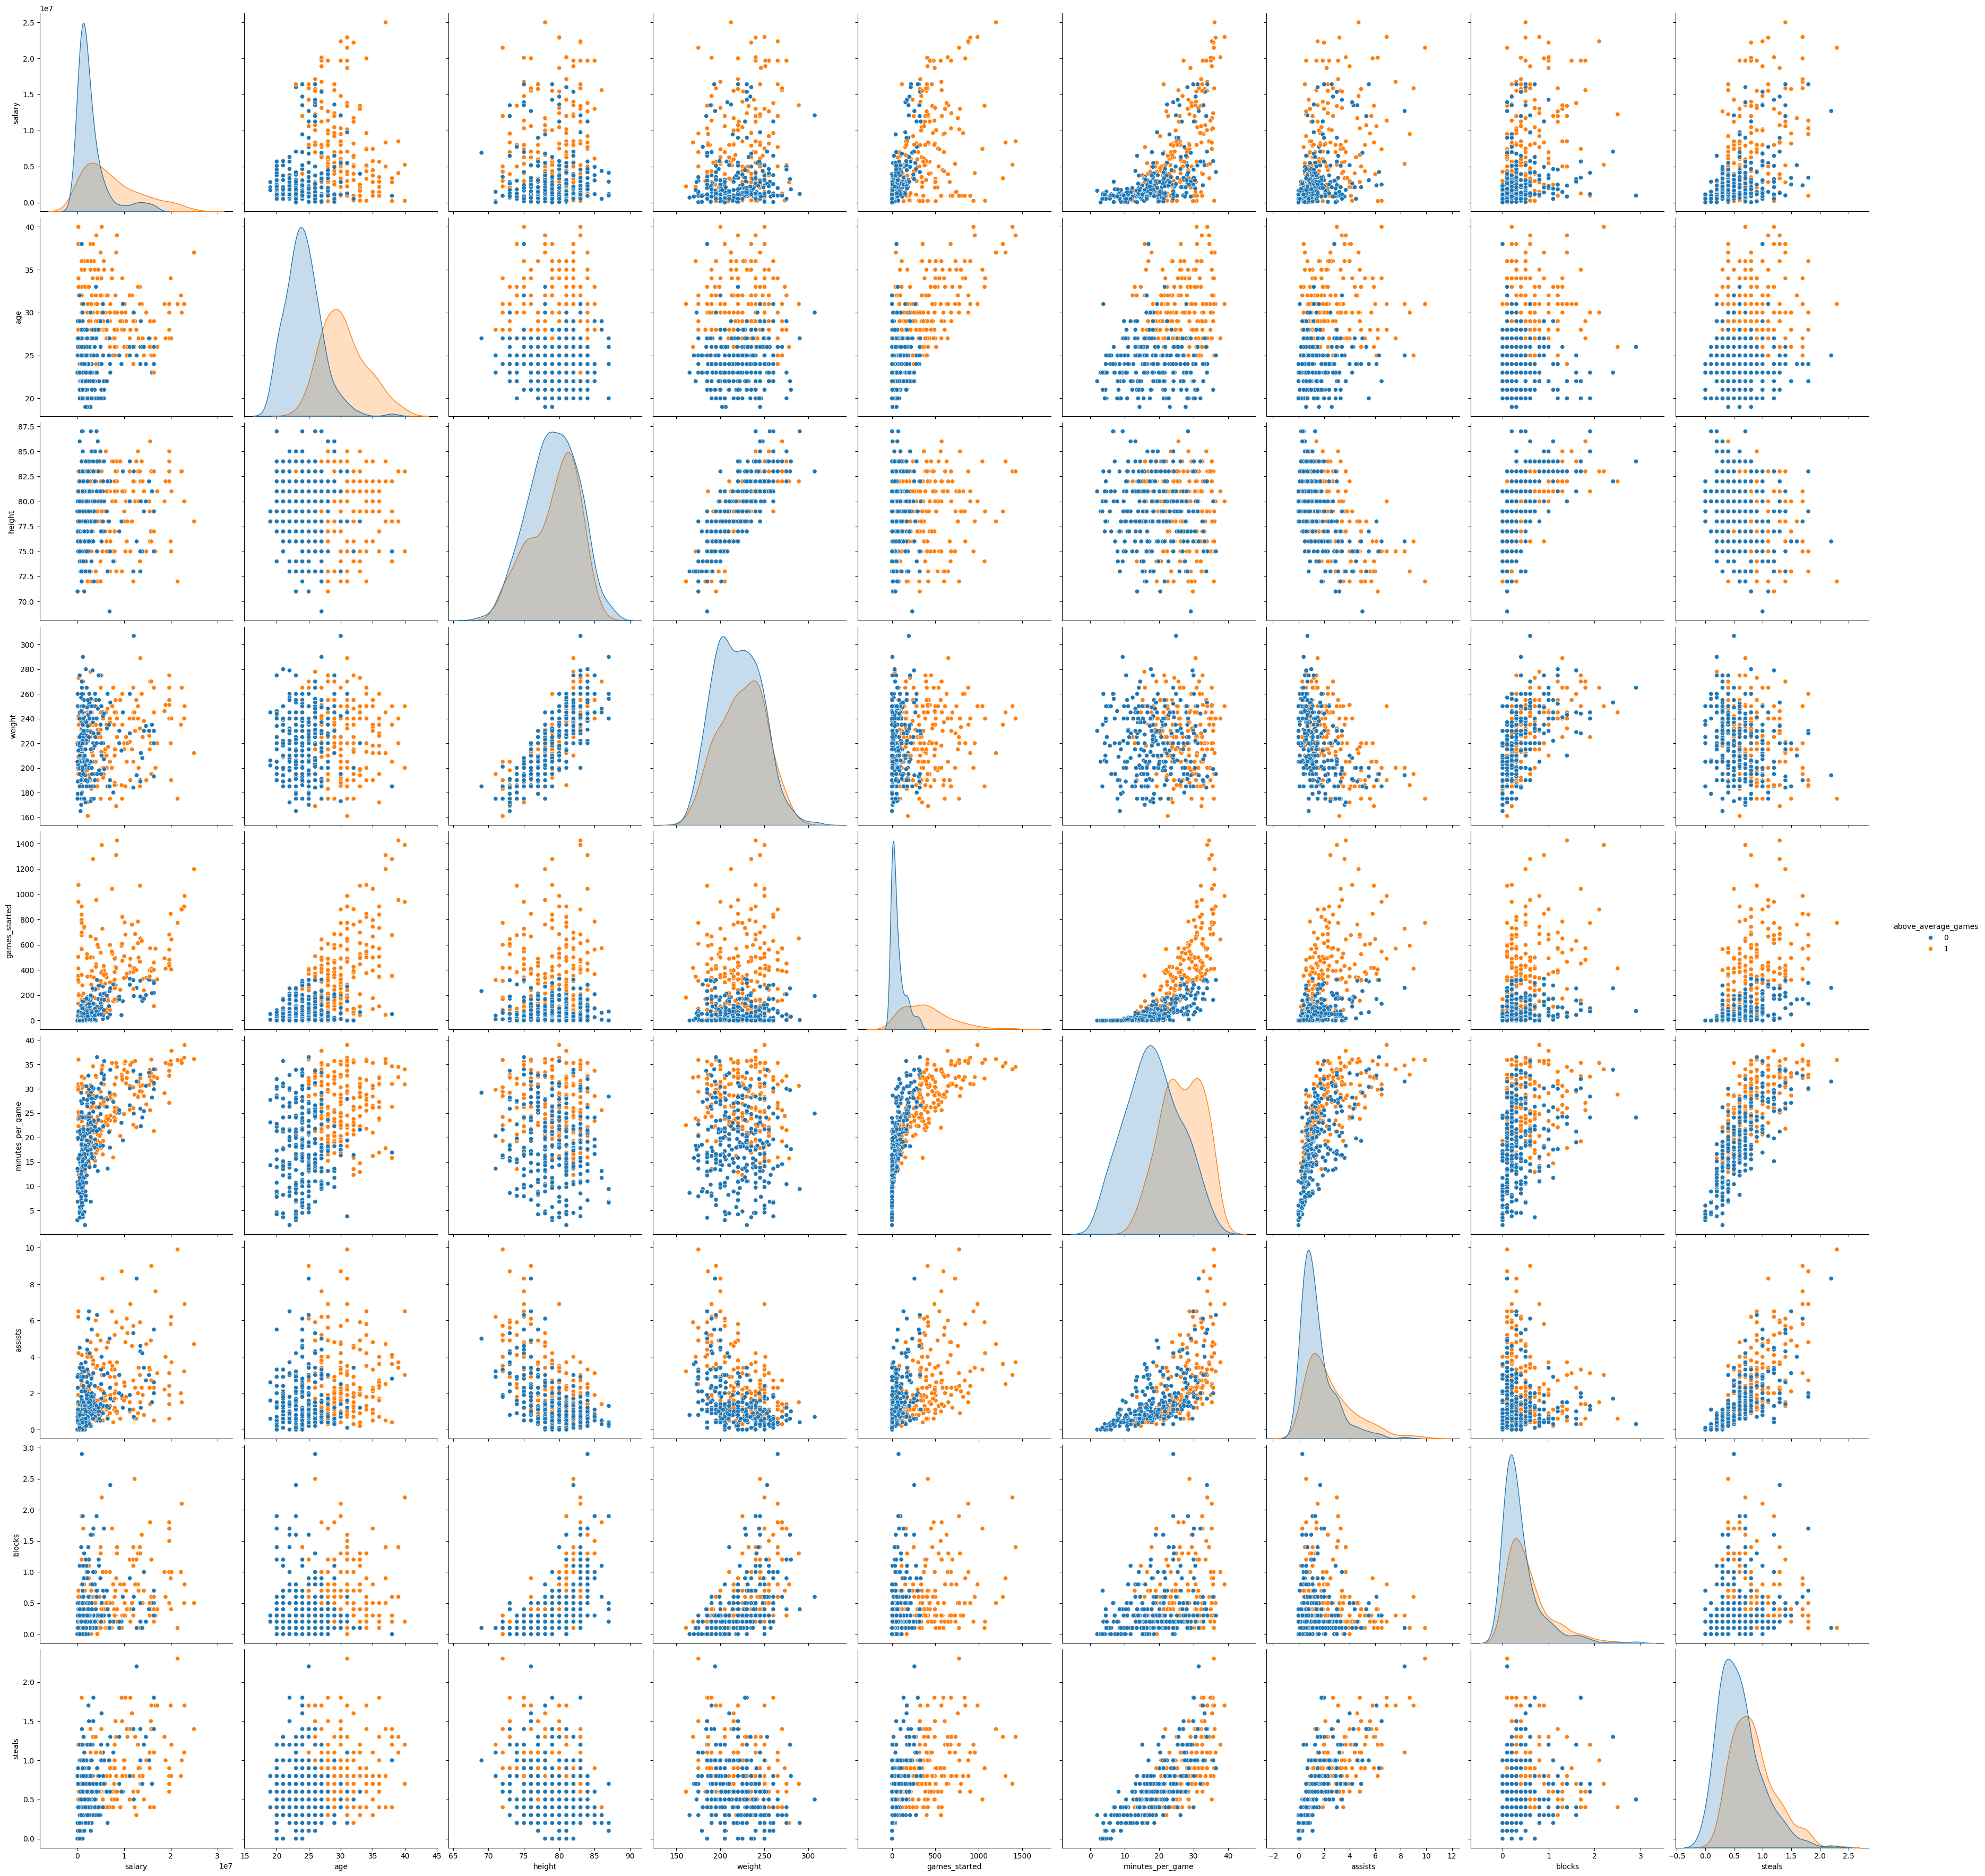

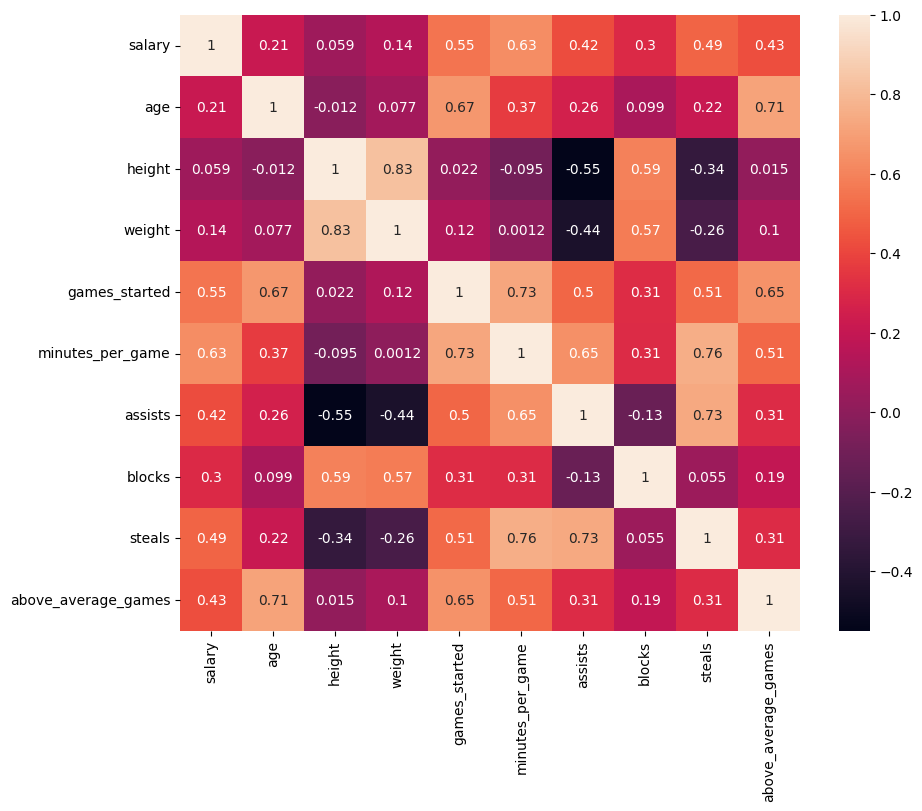


La variable con mayor correlación con los juegos jugados es 'age' con un valor de 0.710


In [ ]:
sns.pairplot(XDB, hue='above_average_games', size=4, vars=['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals'])

#Cuáles son las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(XDB.corr(), annot=True)
plt.show()

# Obtener la variable con mayor correlación con games_played
correlaciones = XDB.corr()['above_average_games'].drop('above_average_games').sort_values(ascending=False)
variable_mas_relevante = correlaciones.idxmax()
valor_correlacion = correlaciones.max()

print(f"\nLa variable con mayor correlación con los juegos jugados es '{variable_mas_relevante}' con un valor de {valor_correlacion:.3f}")

4.2. Se procede con la implementación del modelo

In [ ]:
XD=XDB[['salary', 'age', 'height', 'weight', 'games_started', 'minutes_per_game', 'assists', 'blocks', 'steals']]
yd=XDB['above_average_games']

#Se crean 5 perfiles
np.random.seed(42)
nc=5
mkm = KMeans(n_clusters=nc, init= 'random', random_state=42)
mkm.fit(XD,yd)
centroide=mkm.cluster_centers_

print("Los centroides son:\n", centroide)

#Como quedaron clasificadas las personas
labels=mkm.labels_
XDB['labels']=labels
XDB.head()

Los centroides son:
 [[1.39398411e+07 2.73469388e+01 7.95510204e+01 2.27857143e+02
  3.96040816e+02 2.98061224e+01 3.04693878e+00 6.93877551e-01
  1.05306122e+00]
 [3.97672950e+06 2.74684685e+01 7.95135135e+01 2.24126126e+02
  2.02702703e+02 2.34585586e+01 1.87027027e+00 4.92792793e-01
  7.04504505e-01]
 [2.08213350e+07 3.00625000e+01 8.04375000e+01 2.38125000e+02
  6.88687500e+02 3.45312500e+01 3.71875000e+00 9.62500000e-01
  1.11875000e+00]
 [8.03340889e+06 2.86964286e+01 7.86250000e+01 2.19392857e+02
  3.61410714e+02 2.70196429e+01 2.61071429e+00 4.85714286e-01
  8.67857143e-01]
 [1.16304555e+06 2.56948357e+01 7.90328638e+01 2.18370892e+02
  9.97042254e+01 1.69309859e+01 1.36103286e+00 3.50234742e-01
  5.45539906e-01]]


,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,above_average_games,labels
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,1,4
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1,2
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1,1
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1,1
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1,1


4.3. Caracterización de los centroides

In [ ]:
ND=np.bincount(labels)
print("Tamaño de los clusters es :\n", ND)
NumApr=XDB.groupby('labels').agg({"above_average_games":lambda x: (x==1).sum()})
NumNeg=XDB.groupby('labels').agg({"above_average_games":lambda x: (x==0).sum()})
print("Número de personas por cluster:\n", NumApr)
print("Número de personas por cluster:\n", NumNeg)

Tamaño de los clusters es :
 [ 49 111  16  55 214]
Número de personas por cluster:
         above_average_games
labels                     
0                        33
1                        52
2                        16
3                        43
4                        46
Número de personas por cluster:
         above_average_games
labels                     
0                        16
1                        59
2                         0
3                        12
4                       168


4.4. Se procede con la estimación de los porcentajes de juegos jugados

In [ ]:
NumApr['above_average_games']=NumApr['above_average_games']/ND
NumNeg['above_average_games']=NumNeg['above_average_games']/ND
print("Porcentaje por encima del promedio de juegos por cluster:\n", NumApr)
print("Porcentaje por debajo del promedio de juegos por cluster:\n", NumNeg)

Porcentaje por encima del promedio de juegos por cluster:
         above_average_games
labels                     
0                  0.673469
1                  0.468468
2                  1.000000
3                  0.781818
4                  0.214953
Porcentaje por debajo del promedio de juegos por cluster:
         above_average_games
labels                     
0                  0.326531
1                  0.531532
2                  0.000000
3                  0.218182
4                  0.785047


4.5. Se procede evaluar el desempeño del modelo

In [ ]:
Ydp=np.zeros((len(XD),1))
Vapr=np.array(NumApr)
Vneg=np.array(NumNeg)
for k in range(len(XD)):
  napr=labels[k]
  print("La persona tal:",k)
  print("El cluster al que pertenece es: ",napr)
  print("El porcentaje de que esté por encima del promedio es: ", Vapr[napr])
  print("El porcentaje de que esté por debajo del promedio es:", Vneg[napr])

  #Consolidamos la información de Aprobados y Negados
  if Vapr[napr]>Vneg[napr]:
    Ydp[k]=1
  else:
    Ydp[k]=0

La persona tal: 0
El cluster al que pertenece es:  4
El porcentaje de que esté por encima del promedio es:  [0.21495327]
El porcentaje de que esté por debajo del promedio es: [0.78504673]
La persona tal: 1
El cluster al que pertenece es:  2
El porcentaje de que esté por encima del promedio es:  [1.]
El porcentaje de que esté por debajo del promedio es: [0.]
La persona tal: 2
El cluster al que pertenece es:  1
El porcentaje de que esté por encima del promedio es:  [0.46846847]
El porcentaje de que esté por debajo del promedio es: [0.53153153]
La persona tal: 3
El cluster al que pertenece es:  1
El porcentaje de que esté por encima del promedio es:  [0.46846847]
El porcentaje de que esté por debajo del promedio es: [0.53153153]
La persona tal: 4
El cluster al que pertenece es:  1
El porcentaje de que esté por encima del promedio es:  [0.46846847]
El porcentaje de que esté por debajo del promedio es: [0.53153153]
La persona tal: 5
El cluster al que pertenece es:  3
El porcentaje de que es

In [ ]:
cm_cl=confusion_matrix(yd, Ydp)
print("La matriz de confusión es:\n", cm_cl)
def evaluar_modelo(cm, cm_cl):
    VN, FP, FN, VP = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

    # Métricas de desempeño
    Exactitud = (VP + VN) / (VP + VN + FP + FN)
    Sensibilidad = VP / (VP + FN)  # Recall
    Especificidad = VN / (VN + FP)
    Precision = VP / (VP + FP)
    PrNeg = VN / (VN + FN)  # Valor Predictivo Negativo
    TE = (FP + FN) / (VP + VN + FP + FN)  # Tasa de Error


    print("Exactitud:", Exactitud)
    print("Sensibilidad:", Sensibilidad)
    print("Especificidad:", Especificidad)
    print("Precisión:", Precision)
    print("Precisión Negativa:", PrNeg)
    print("Tasa de Error:", TE)

# Evaluar modelos

evaluar_modelo(cm_cl, "Clusterización")

La matriz de confusión es:
 [[227  28]
 [ 98  92]]
Exactitud: 0.7168539325842697
Sensibilidad: 0.4842105263157895
Especificidad: 0.8901960784313725
Precisión: 0.7666666666666667
Precisión Negativa: 0.6984615384615385
Tasa de Error: 0.28314606741573034


4.6. Se evalúa una persona

In [ ]:
Xdm=([5000000,37,82,245,45,17.8,0.5,1.4,0.4])
print("La persona pertenece al cluster: ", mkm.predict([Xdm]))
print("El porcentaje de estar encima del promedio de juegos es: ", Vapr[mkm.predict([Xdm])])
print("El porcentaje de estar debajo del promedio de juegos es: ", Vneg[mkm.predict([Xdm])])


La persona pertenece al cluster:  [1]
El porcentaje de estar encima del promedio de juegos es:  [[0.46846847]]
El porcentaje de estar debajo del promedio de juegos es:  [[0.53153153]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


El jugador pertenece al cluster:: [1]
Probabilidad de Above Avg: [[0.46846847]]
Probabilidad de Below Avg: [[0.53153153]]


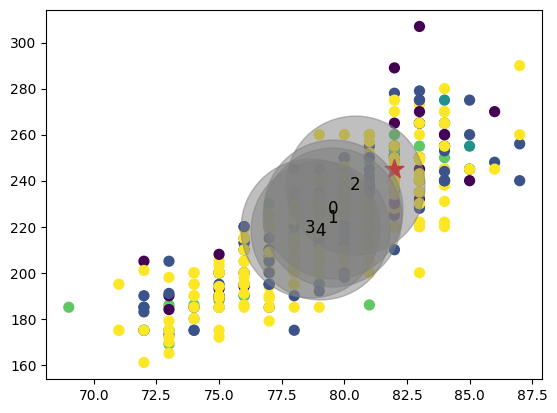

In [ ]:
XDn = ([5000000, 37, 82, 245, 45, 17.8, 0.5, 1.4, 0.4])
XDn = np.array(XDn).reshape(1, -1)
ydn= mkm.predict(XDn)
centroids=mkm.cluster_centers_
print('El jugador pertenece al cluster::',mkm.predict(XDn))
print('Probabilidad de Above Avg:', Vapr[ydn])
print('Probabilidad de Below Avg:', Vneg[ydn])

XD=np.array(XD)
plt.scatter(XD[:,2],XD[:,3],c=labels,s=50,cmap='viridis')
# Replace XD1 with XDn which contains the new player data
plt.scatter(XDn[:,2],XDn[:,3],marker='*',s=200,facecolors='red') # Changed XD1 to XDn
plt.scatter(centroids[:,2],centroids[:,3],marker='*',s=200,facecolors='yellow')
plt.scatter(centroids[:,2],centroids[:,3],alpha=0.5,marker='o',s=10000,facecolors='grey')

for i, c in enumerate (centroids):
  plt.text(c[2],c[3],str(i),fontsize=12,color='black',ha='center',va='center')

#**Análisis de resultados**

**Modelo Naive Bayes**

El modelo Naive Bayes fue aplicado para predecir si un jugador de la NBA tiene un número de juegos jugados por encima o por debajo del promedio, utilizando variables como salario, edad, altura, peso, juegos iniciados, minutos por partido, asistencias, bloqueos y robos.

Los resultados mostraron que el modelo alcanzó una exactitud del 78.65%, lo que indica que en aproximadamente 8 de cada 10 casos, la predicción fue correcta. Sin embargo, la tasa de error del 21.38% sugiere que el modelo aún tiene margen de mejora. En términos de sensibilidad, se obtuvo un 60%, lo que significa que el modelo tiene un desempeño aceptable en la identificación de jugadores con un número de juegos jugados superior al promedio. No obstante, la especificidad fue mayor, con un 92.54%, lo que indica que el modelo no tiene dificultades para identificar correctamente a los jugadores con un número de juegos jugados por debajo del promedio.

En cuanto a la precisión, el modelo obtuvo un 85.7%, lo que demuestra que las predicciones para jugadores con una cantidad de juegos superior al promedio fueron en su mayoría acertadas. Sin embargo, la precisión negativa fue del 75.6%, lo que sugiere que el modelo no clasifica con la misma eficacia a los jugadores con menos juegos jugados. En general, el modelo Naive Bayes demostró ser una opción confiable.

**Árbol de Decisión**

El modelo de Árbol de Decisión fue implementado con una estructura limitada a 4 niveles de profundidad para garantizar un equilibrio entre precisión y generalización. Su desempeño reflejó una exactitud del 95.5%, mostrando una mejora en comparación con Naive Bayes. Esto indica que el modelo tiene una capacidad superior para clasificar correctamente a los jugadores según su cantidad de juegos jugados.

La matriz de confusión mostró un alto número de verdaderos positivos (247) y verdaderos negativos(178), lo que indica que el modelo distingue correctamente tanto a los jugadores con un número de juegos superior al promedio como a aquellos con menor participación. La sensibilidad alcanzó un 93.68%, lo que significa que identifica correctamente a la mayoría de los jugadores que juegan más partidos. Asimismo, la especificidad fue de 96.86%, lo que indica que el modelo tiene una alta capacidad para identificar correctamente a los jugadores con un número de juegos jugados por debajo del promedio, minimizando la cantidad de falsos positivos.

En cuanto a la precisión, se obtuvo un 95.69%, lo que confirma que el modelo es confiable para predecir la categoría de un jugador. De igual manera, la precisión negativa de 95.3% sugiere que, el modelo clasifica correctamente a la mayoría de los jugadores que tuvieron un número de juegos jugados por debajo del promedio, reduciendo significativamente los errores en esta categoría. En términos generales, el Árbol de Decisión presentó un mejor desempeño que Naive Bayes, siendo más efectivo en la identificación de jugadores con mayor cantidad de juegos.

**Modelo de Clusterización (K-Means)**

Finalmente, se utilizó el método de clusterización K-Means y se establecieron cinco clústeres, con el fin de agrupar a los jugadores según sus características y su relación con el número de juegos jugados. A partir del análisis de correlaciones, se encontró que la variable con mayor relación con el número de juegos jugados fue la edad, con un coeficiente de correlación de 0.710. Esto sugiere que, en este conjunto de datos, la edad es un factor clave para determinar la cantidad de juegos en los que participa un jugador.

Los centroides de los clústeres muestran diferencias significativas en términos de las variables analizadas. Por ejemplo, el clúster 2, que representa a los jugadores con los valores más altos en salario, minutos por partido y asistencias, tiene un porcentaje del 100% de jugadores por encima del promedio de juegos jugados. En contraste, el clúster 4, caracterizado por menores minutos en cancha y estadísticas más bajas en general, tiene solo un 21.49% de jugadores por encima del promedio, lo que indica que en este grupo predominan jugadores con menor participación en los partidos.

En cuanto a la distribución de jugadores dentro de los clústeres, el clúster con mayor cantidad de jugadores fue el clúster 4, con 214 jugadores, mientras que el clúster con menor cantidad de jugadores fue el clúster 3, con solo 16 jugadores. Esto refleja que la mayoría de los jugadores pertenecen a un grupo con características asociadas a menor participación en los partidos, mientras que solo una minoría se encuentra en el grupo de élite con altos valores en las métricas clave.

Para evaluar el desempeño del modelo de clusterización, se calcularon diversas métricas. La exactitud alcanzada fue del 71.6%, lo que indica un desempeño adecuado en la clasificación de jugadores dentro de sus respectivos grupos. La sensibilidad fue de 48.4%, lo que sugiere que el modelo tiene dificultades para identificar correctamente a los jugadores con un número de juegos jugados superior al promedio. No obstante, la especificidad alcanzó un 89.01%, lo que demuestra que el modelo es altamente efectivo en la identificación de jugadores con un número de juegos jugados por debajo del promedio.

En términos de precisión, el modelo obtuvo un 76.6%, lo que indica que la mayoría de las predicciones para jugadores con un número de juegos superior al promedio fueron correctas. Sin embargo, la precisión negativa fue de 69.84%, lo que sugiere que el modelo aún presenta cierto margen de error en la clasificación de jugadores con menos juegos jugados. Finalmente, la tasa de error del modelo fue del 28.31%, reflejando que, aunque el modelo presenta un buen desempeño general, aún hay espacio para mejorar la segmentación de los jugadores.

**Evaluación de un jugador**

Para evaluar la efectividad de los modelos Naive-Bayes y K-means, se analizó un jugador con las características [5000000, 37, 82, 245, 45, 17.8, 0.5, 1.4, 0.4]. En el modelo Naive Bayes, este jugador fue clasificado como un jugador con un número de juegos jugados por debajo del promedio, lo que sugiere que sus características coinciden con las de jugadores que tienen una menor participación en los partidos.

Por otro lado, utilizando el modelo de K-Means, el jugador fue asignado al clúster 1. En este grupo, el 47.79% de los jugadores están por encima del promedio en juegos jugados, mientras que el 52.21% están por debajo. Esto indica que el jugador se encuentra en un grupo donde la probabilidad de estar por encima o por debajo del promedio está relativamente equilibrada, aunque con una ligera tendencia hacia una menor participación en los partidos.

En conjunto, ambos modelos sugieren que el jugador tiene una mayor probabilidad de estar por debajo del promedio en juegos jugados, aunque su clasificación dentro del clúster 1 indica que su desempeño podría estar en el límite entre ambos grupos


Por otro lado, el modelo de árbol de decisión ha determinado que el jugador tiene una probabilidad del 83.33% de estar por encima del promedio y solo un 16.67% de estar por debajo del promedio. Esto se basa en el análisis de sus características, las cuales lo llevaron a un nodo final del árbol de decisión donde la mayoría de los jugadores pertenecen a la categoría superior.

Para llegar a esta clasificación, el jugador siguió una serie de reglas dentro del árbol de decisión. En primer lugar, se encuentra en el grupo de jugadores con una edad menor o igual a 26.5 años. Luego, se identificó que el número de juegos iniciados es menor o igual a 84, y dentro de ese grupo, que ha comenzado menos de 38 juegos. Finalmente, el modelo lo clasificó en un nodo donde los jugadores tienen menos de 0.65 asistencias por partido, lo que llevó a la predicción de estar por encima del promedio en términos generales.

Dado que la mayoría de los jugadores en este grupo han tenido un desempeño superior, el modelo asigna al jugador la categoría 1 (por encima del promedio).